In [2]:
import pandas as pd

In [3]:
cctv_seoul = pd.read_csv("C:\\Users\\yjy99\\Desktop\\Python\\Python_sync\\파이썬 머슬캠프\\DataFile\\data\\01. CCTV_in_Seoul.csv", encoding = "UTF-8")
# 현재 디렉터리의 상위 디렉터리 = ../ 로 표시.
cctv_seoul.head()

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


In [4]:
cctv_seoul.columns

Index(['기관명', '소계', '2013년도 이전', '2014년', '2015년', '2016년'], dtype='object')

In [5]:
cctv_seoul.rename(columns = {cctv_seoul.columns[0] : "구"}, inplace = True)
# inplace는 표를 이루는 값을 객체 내에서 변경하고 싶을 때 True로 사용함.
cctv_seoul.head()

,구,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


In [6]:
pop_seoul = pd.read_excel("C:\\Users\\yjy99\\Desktop\\Python\\Python_sync\\파이썬 머슬캠프\\DataFile\\data\\01. population_in_Seoul.xls", encoding = "UTF-8")
pop_seoul.head()

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\yjy99\\Desktop\\Python\\Python_sync\\파이썬 머슬캠프\\DataFile\\data\\01. population_in_Seoul.xls'

In [ ]:
pop_seoul = pd.read_excel("C:\\Users\\yjy99\\Desktop\\Python\\Python_sync\\파이썬 머슬캠프\\DataFile\\data\\01. population_in_Seoul.xls",
                          header = 2,
                          usecols = "B, D, G, J, N",
                          encoding = "UTF-8")
# header 변수를 지정하면 해당하는 인덱스를 가진 행을 제목으로 사용하고, 그 다음 행부터는 표의 내용으로 사용함.
pop_seoul.head()

In [ ]:
pop_seoul.rename(columns = {pop_seoul.columns[0] : "구",
                            pop_seoul.columns[1] : "인구 수",
                            pop_seoul.columns[2] : "한국인",
                            pop_seoul.columns[3] : "외국인",
                            pop_seoul.columns[4] : "고령자"}, inplace = True)
pop_seoul.head()

In [ ]:
cctv_seoul.head()

In [ ]:
cctv_seoul.sort_values(by = "소계", ascending = True).head()  # 내림차순 정렬

In [ ]:
cctv_seoul.sort_values(by = "소계", ascending = False).head()  # 오름차순 정렬

In [ ]:
cctv_seoul["최근증가율"] = (cctv_seoul["2016년"] + cctv_seoul["2015년"] +
                       cctv_seoul["2014년"]) / cctv_seoul["2013년도 이전"] * 100
cctv_seoul.sort_values(by = "최근증가율", ascending = False).head(5)

In [ ]:
pop_seoul.head()

In [ ]:
pop_seoul.drop([0], inplace = True)  # 값을 지울 때에는 drop 메소드 사용. 값을 변경할 때는 항상 inplace = True.
pop_seoul.head()

In [ ]:
pop_seoul["구"].unique()  # 중복된 값이 있으면 하나만 출력하고, 하나 이상의 서로 다른 값들은 리스트로 만들어 출력한다.

In [ ]:
pop_seoul[pop_seoul["구"].isnull()]  # isnull()로 null 값의 위치를 알아냄. 위 리스트의 마지막에 있는 nan이 null 값.

In [ ]:
pop_seoul.drop([26], inplace = True)
pop_seoul.head()

In [ ]:
pop_seoul["외국인비율"] = pop_seoul["외국인"] / pop_seoul["인구 수"] * 100
pop_seoul["고령자비율"] = pop_seoul["고령자"] / pop_seoul["인구 수"] * 100
pop_seoul.head()

In [ ]:
pop_seoul.sort_values(by = "고령자", ascending = False).head()

In [ ]:
pop_seoul.sort_values(by = "고령자비율", ascending = False).head()

    pop_seoul.sort_values(by = "고령자비율", ascending = False).head(5)
**_by = "정렬 기준으로 사용할 값"_**

## 2일차

In [ ]:
data_result = pd.merge(cctv_seoul, pop_seoul, on = "구")
data_result.head()

In [ ]:
del data_result["2013년도 이전"]
del data_result["2014년"]
del data_result["2015년"]
del data_result["2016년"]
# 열을 삭제할 때는 del, 행을 삭제할 때는 drop 사용

data_result.head()

In [ ]:
data_result.set_index("구", inplace = True)  # 기존에 설정한 index = [0, 1, 2, ..., 11]를 "구"에 해당하는 열의 값으로 대치.
data_result.head()

------
------

In [ ]:
import numpy as np

In [ ]:
np.corrcoef(data_result["고령자비율"], data_result["소계"])

In [ ]:
np.corrcoef(data_result["외국인비율"], data_result["소계"])

In [ ]:
np.corrcoef(data_result["인구 수"], data_result["소계"])

**<상관계수>**

    np.corrcoef(data_result["인구 수"], data_result["소계"]) == 상관계수를 행렬로 출력하는 함수
    
    array([[1.        , 0.30634228],  
           [0.30634228, 1.        ]])
          
np.corrcoef()의 출력에서 오른쪽 위의 0.30634228이 상관계수이다.

상관계수는 두 데이터 사이의 관련성을 수치적으로 나타내는 것이다.  
0.0 이하면 무시해도 되는 수준의 관련성을 의미하고,  
0.3 이면 약한 상관관계가 있음을 의미하며,  
0.7 이상이면 강한 상관관계가 있음을 의미한다.

------
------

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

In [10]:
t = np.arange(0, 12, 0.01)  # arnage(a, b, c)는 a부터 b 사이의 값을 c만큼 바꾼 결과에 대한 행렬을 반환한다.
y = np.sin(t)

In [ ]:
plt.figure(figsize = (10, 6))  # figsize = (a, b)는 x축으로 a만큼, y축으로 b만큼의 크기를 갖는 그래프를 그린다는 의미이다.
plt.plot(t, y)
plt.show()

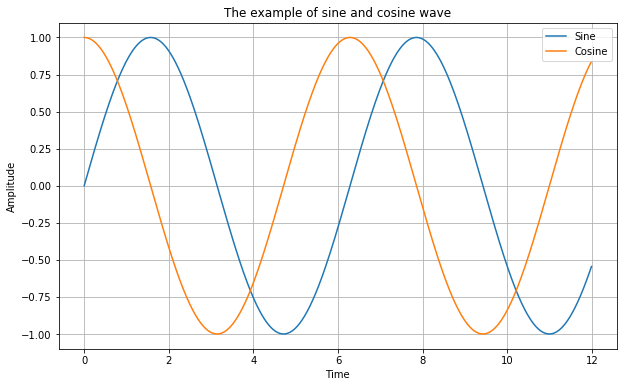

In [13]:
plt.figure(figsize = (10, 6))

plt.plot(t, np.sin(t), label = "Sine")
plt.plot(t, np.cos(t), label = "Cosine")

plt.legend()

plt.grid()  # 좌표계 그리드 표시

plt.xlabel("Time")  # x축 이름 표시
plt.ylabel("Amplitude")  # y축 이름 표시

plt.title("The example of sine and cosine wave")  # 그래프 제목 표시

plt.show()

In [ ]:
t = [0, 1, 2, 3, 4, 5, 6]
y = [1, 4, 5, 8, 9, 5, 3]

plt.figure(figsize = (10, 6))

plt.plot(t, y, color = "green")

plt.show()

In [ ]:
t = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
y = np.array([9, 8, 7, 9, 8, 3, 2, 4, 3, 4])

In [ ]:
plt.figure(figsize = (10, 6))

plt.scatter(t, y)  # 분산형 차트로 표시

plt.show()

In [ ]:
colormap = t

plt.figure(figsize = (10, 6))

plt.scatter(t, y, s = 50, c = colormap, marker = "x")  # marker = x, p, >, <, o 등을 사용 가능

plt.colorbar()  # 색상표 사용

plt.show()

In [ ]:
s1 = np.random.normal(loc = 0, scale = 1, size = 1000)
s2 = np.random.normal(loc = 5, scale = 0.5, size = 1000)
s3 = np.random.normal(loc = 10, scale = 2, size = 1000)

In [ ]:
plt.figure(figsize = (15, 10))

plt.plot(s1, lable = "s1")
plt.plot(s2, lable = "s2")
plt.plot(s3, lable = "s3")

plt.legend()

plt.show()

In [ ]:
plt.figure(figsize = (15, 10))

plt.boxplot((s1, s2, s3))

plt.grid()

plt.show()

In [ ]:
import platform

from matplotlib import font_manager, rc
plt.rcParams["axes.unicode_minus"] = False

if platform.system() == "Darwin":
    rc("font", family = "AppleGothic")
    
elif platform.system() == "Windows":
    path = "C:\\Windows\\Fonts\\malgun.ttf"
    font_name = font_manager.FontProperties(fname = path).get_name()
    rc("font", family = font_name)
    
else:
    print("Not available system")

In [ ]:
data_result.head()

In [ ]:
plt.figure()

data_result["소계"].plot(kind = "barh", grid = True, figsize = (15, 10))

plt.show()

In [ ]:
data_result["소계"].sort_values().plot(kind = "barh", grid = True, figsize = (15, 10))

plt.show()

In [ ]:
data_result["CCTV 비율"] = data_result["소계"] / data_result["인구 수"] * 100  # 데이터에 열 추가.

data_result["CCTV 비율"].sort_values(ascending = False).plot(kind = "bar", grid = True, figsize = (15, 10))  # 앞에서 추가한 열을 기준으로 정렬.

plt.show()

In [ ]:
plt.figure(figsize = (6, 6))

plt.scatter(data_result["인구 수"], data_result["소계"], s = 50, marker = "x")  # marker = x, p, >, <, o 등을 사용 가능

plt.xlabel("인구 수")
plt.ylabel("CCTV")

plt.grid()

plt.show()

In [ ]:
fp1 = np.polyfit(data_result["인구 수"], data_result["소계"], 1)  # 평균값을 나타내는 직선을 표시하는 함수.

fp1

In [ ]:
f1 = np.poly1d(fp1)  # poly1d는 평균값을 찾아서 반환하는 명령어
fx = np.linspace(100000, 700000, 100)  # x축

In [ ]:
plt.figure(dpi = 121, num = 1, figsize = (10, 10))

plt.scatter(data_result["인구 수"], data_result["소계"], s = 50)

plt.plot(fx, f1(fx), ls = "dotted", lw = 3, color = "gray")

plt.xlabel("인구 수", fontsize = 16)
plt.ylabel("CCTV", fontsize = 16)

plt.grid()

plt.show()

In [ ]:
fp1 = np.polyfit(data_result["인구 수"], data_result["소계"], 1)
f1 = np.poly1d(fp1)
fx = np.linspace(100000, 700000, 100)

data_result["오차"] = np.abs(data_result["소계"] - f1(data_result["인구 수"]))

df_sort = data_result.sort_values(by = "오차", ascending = 0)
df_sort.head()

In [ ]:
plt.figure(dpi = 100, figsize = (14, 10))

plt.scatter(data_result["인구 수"], data_result["소계"], c = data_result["오차"], s = 50)

plt.plot(fx, f1(fx), ls = "dotted", lw = 3, color = "gray")

for n in range(10):
    plt.text(df_sort["인구 수"][n] * 1.02, df_sort["소계"][n] * 0.98,
             df_sort.index[n], fontsize = 16)
    
plt.xlabel("인구 수", fontsize = 16)
plt.ylabel("비율", fontsize = 16)

plt.colorbar()
plt.grid()

plt.show()